In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_raw = pd.read_csv('housing.csv')
df_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
for col in df_raw.columns:
  print(col, df_raw[col].isnull().sum())

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 207
population 0
households 0
median_income 0
median_house_value 0
ocean_proximity 0


In [5]:
df_raw.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


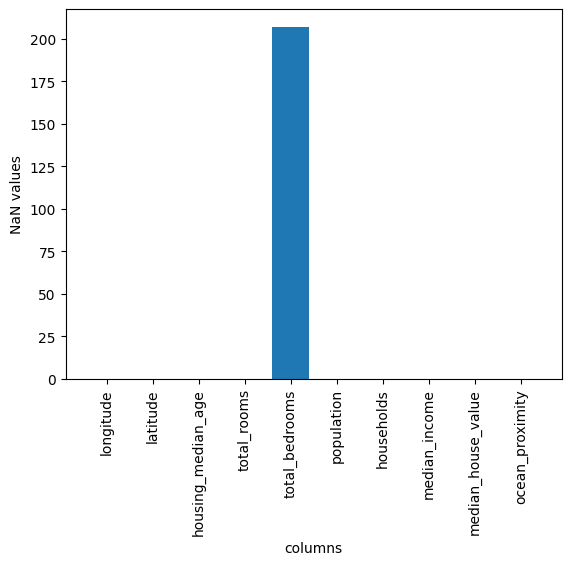

In [6]:
plt.bar(df_raw.columns, df_raw.isnull().sum())
plt.xlabel('columns')
plt.ylabel('NaN values')
plt.xticks(rotation=90)
plt.show()

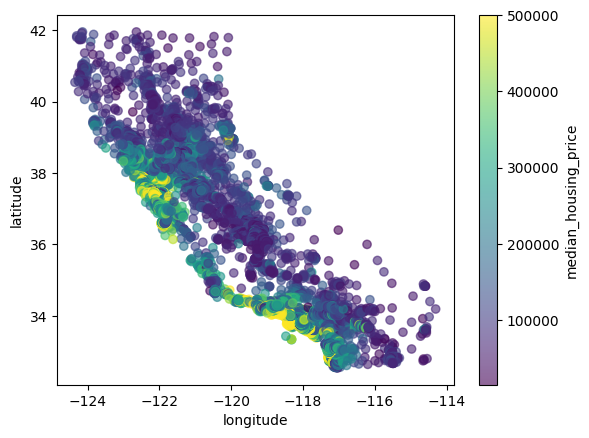

In [7]:
plt.scatter(df_raw['longitude'], df_raw['latitude'], c= df_raw['median_house_value'],
            alpha = 0.6)
plt.colorbar(label = 'median_housing_price')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

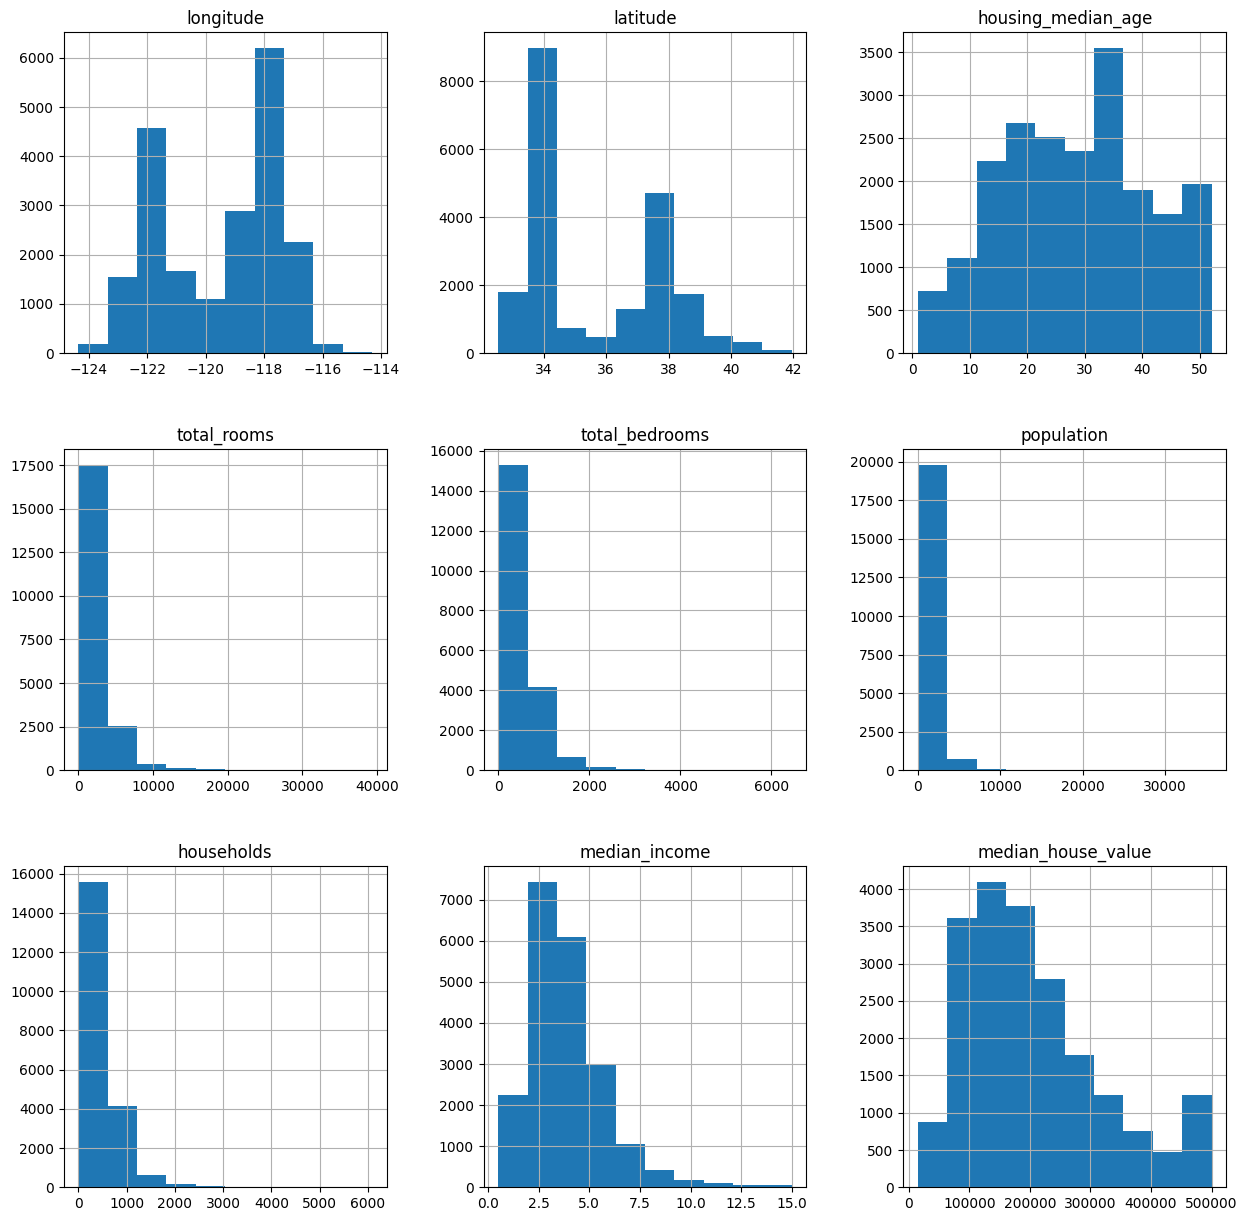

In [8]:
df_raw.hist(figsize=(15,15))
plt.show()

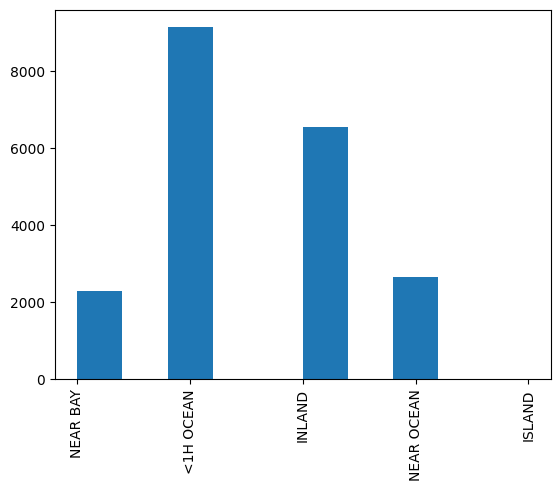

In [9]:
plt.hist(df_raw['ocean_proximity'])
plt.xticks(rotation=90)
plt.show()

In [10]:
df = df_raw.copy()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[['total_bedrooms']] = imputer.fit_transform(df[['total_bedrooms']])
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


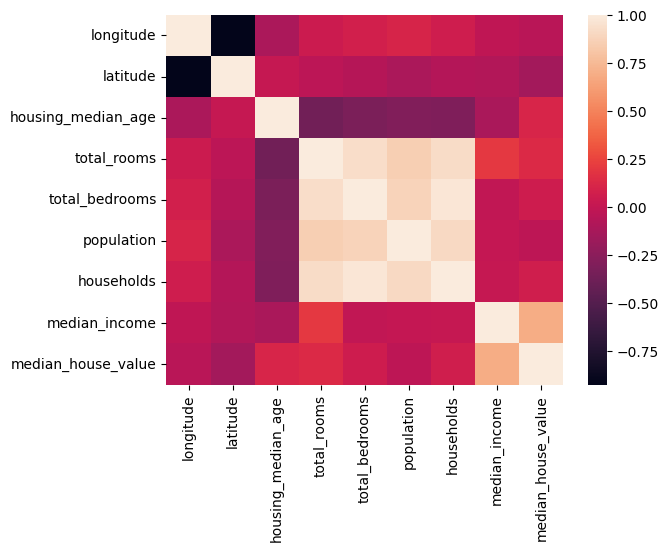

In [12]:
numeric_columns = df.select_dtypes(include = np.number).columns

sns.heatmap(df[numeric_columns].corr(), fmt= '.2f')
plt.show()

In [13]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first = True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [14]:
from sklearn.model_selection import train_test_split


data = df.drop('median_house_value', axis=1)
target = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42, test_size= 0.3)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 12)
(6192, 12)
(14448,)
(6192,)


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

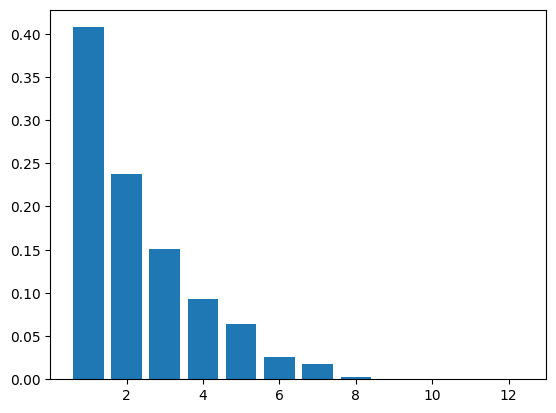

In [18]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.bar(range(1, len(explained_variance) + 1), explained_variance, label='Explained Variance')
plt.show()

In [19]:

from sklearn.model_selection import RandomizedSearchCV

models = {
    'Linear Regression': LinearRegression(),
    'Linear SVR': LinearSVR(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

param_dict = {
    'Linear Regression': [{}],
    'Linear SVR': [
        {
            'C': [0.01, 0.1, 1, 10, 100],
            'epsilon': [0.01, 0.1, 0.2, 0.5, 1],
            'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
        }
    ],
    'Random Forest': [
        {
            'n_estimators': [50, 100, 200, 300],
            'max_depth': [None, 3, 5, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
    ],
    'Gradient Boosting': [
        {
            'n_estimators': [50, 100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [3, 5, 8, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'subsample': [0.7, 0.8, 0.9, 1.0]
        }
    ]
}

for model_name, model in models.items():
  print(f"Optimizing {model_name}...")
  random_search = RandomizedSearchCV(model, param_dict[model_name], scoring='r2',
                               n_iter=10, cv=5, random_state=42, verbose = 1)
  random_search.fit(X_train_scaled, y_train)
  best_model = random_search.best_estimator_
  best_params = random_search.best_params_
  best_score = random_search.best_score_

  print(f"Best Model: {best_model}")
  print(f"Best Parameters: {best_params}")
  print(f"Best Score (r2): {best_score}")


Optimizing Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Model: LinearRegression()
Best Parameters: {}
Best Score (r2): 0.6442582011508995
Optimizing Linear SVR...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Model: LinearSVR(C=100, epsilon=0.2, loss='squared_epsilon_insensitive')
Best Parameters: {'loss': 'squared_epsilon_insensitive', 'epsilon': 0.2, 'C': 100}
Best Score (r2): 0.6445137253895751
Optimizing Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Model: RandomForestRegressor(max_features='log2', min_samples_split=5,
                      n_estimators=200)
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best Score (r2): 0.8077005392595489
Optimizing Gradient Boosting...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Model: GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=4,
                          min_samples_split=5, n_estimators=200, subsample=0.9)
Best Parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'learning_rate': 0.05}
Best Score (r2): 0.82865

In [20]:
model = random_search.best_estimator_
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2151835263.7436523
R-squared: 0.8360556564379812


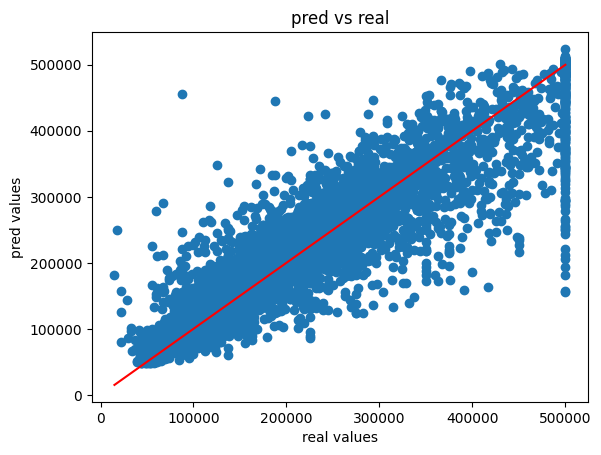

In [22]:

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('real values')
plt.ylabel('pred values')
plt.title('pred vs real')
plt.show()